<a href="https://colab.research.google.com/github/ayberkcorp/cap5610-machine_learning/blob/master/hw4/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2


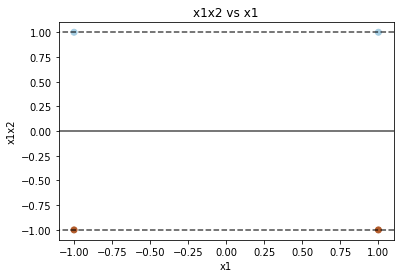

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([-1, 1, 1, -1])

map = np.zeros([4, 2])
map[:, 0] = X[:, 0]
map[:, 1] = X[:, 0] * X[:, 1]

clf = svm.SVC(kernel='linear')
clf.fit(map, Y)

plt.scatter(map[:, 0], map[:, 1], c=Y, cmap=plt.cm.Paired)

ax = plt.gca()
plt.title('x1x2 vs x1')
ax.set_xlabel('x1')
ax.set_ylabel('x1x2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 50)
y = np.linspace(ylim[0], ylim[1], 50)

x_data, y_data = np.meshgrid(x, y)

z = clf.decision_function(np.vstack([x_data.ravel(), y_data.ravel()]).T).reshape(x_data.shape)

ax.contour(x_data, y_data, z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none')

plt.show()

Positives are below the hyperplane (colored in red) and negatives are above it (colored in light blue).

The positive data points have $x_1y_1=-1$ while the negative ones have $x_1y_1=+1$. The maximum margin hyperplane is the line $x_1x_2=0$, with a margin of 1.

# Task 5

### a)

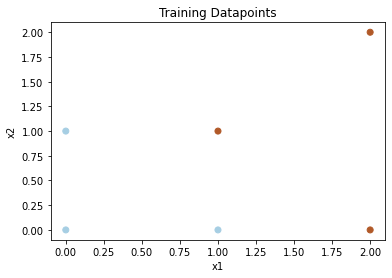

In [2]:
X = np.array([[1, 1], [2, 2], [2, 0], [0, 0], [1, 0], [0, 1]])
Y = np.array([1, 1, 1, -1, -1, -1])

ax = plt.gca()
plt.title('Training Datapoints')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired);

From the plot above, we can see that the two classes are linearly separable.

### b)

By inspection, we see that the maximum margin hyperplane has a slope of -1 and x and y-intercept of 1.5. Thus, the equation for it is $x_1+x_2-1.5=0$, and so its weight vector is $(1, 1)^T$.

# Task 7

In [3]:
import pandas as pd
import random as rnd
from sklearn.model_selection import train_test_split, cross_val_score

# This is reused code from hw2 (kept test_df/combine even though it
# is not needed since we will be splitting the training set
# so that I did not have to rewrite this code)

train_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/test.csv')
combine = [train_df, test_df]

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

freq_port = train_df.Embarked.dropna().mode()[0]
train_df = train_df.fillna(freq_port)

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# New code starts here (dropped unimportant features based on information from hw2)

X_train = train_df.drop(['Survived', 'SibSp', 'Parch', 'Embarked'], axis=1)
Y_train = train_df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
acc_scores = cross_val_score(clf, X_train, y=Y_train, scoring='accuracy', cv=5)
print('Accuracy for linear kernel: ', acc_scores.mean())

# Quadratic kernel
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X_train, Y_train)
acc_scores = cross_val_score(clf, X_train, y=Y_train, scoring='accuracy', cv=5)
print('Accuracy for quadratic kernel: ', acc_scores.mean()) 

# RBF kernel
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
acc_scores = cross_val_score(clf, X_train, y=Y_train, scoring='accuracy', cv=5)
print('Accuracy for RBF kernel: ', acc_scores.mean())

Accuracy for linear kernel:  0.7878755047769133
Accuracy for quadratic kernel:  0.636245444696149
Accuracy for RBF kernel:  0.6432286023835321


Based on the average classification accuracy scores above, we can see that the linear kernel is the best (in my case).